# Examining the SWS catalog of data

In [1]:
import glob
import numpy as np

from swsnet import helpers  # Needs astropy fot FITS operations.

## Data location

In [2]:
# Location of fits/csv files.
fits_dir = 'data/fits/'
fits_files = np.sort(glob.glob(fits_dir + '*.fit'))
csv_dir = 'data/csv/'

In [3]:
# FITS files.
for index, value in enumerate(fits_files):
    print(index, value)

0 data/fits/02400714_sws.fit
1 data/fits/02400807_sws.fit


###### N.B., full dataset is 1262 .fit files, totaling 400MB.

## Data format: FITS

Each fits file contains:
    - wavelength array ("x")
    - flux array ("y")
    - spectroscopic error array ("yerr")
    - normalization error array (alternate "yerr")
    
Accessible by `astropy.io.fits`, as used by `helpers`

`helpers.fits_to_dataframe` can be used to extract the FITS columns as a pandas dataframe and a astropy `header` object (easily cast to string or maybe something else if needed; just contains information regarding the time of observation, instrument used, etc).

In [4]:
dataframe, header = helpers.fits_to_dataframe(fits_files[0])

In [5]:
dataframe.head()

,wave,flux,spec_error,norm_error
0,2.36000,-3.34,0.52,0.52
1,2.36013,-3.23,0.52,0.52
2,2.36025,-3.13,0.52,0.52
3,2.36038,-3.06,0.51,0.51
4,2.36050,-3.01,0.51,0.51


In [6]:
header

SIMPLE  =                    T / Written by IDL:  Wed Apr  9 10:12:29 2003      
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                    4 /                                                
NAXIS2  =                48924 /                                                
NSEG    =                   12 / Number of spectral segments                    
NSEG01  =                 1921 / Length of segment  1                           
NSEG02  =                 2520 / Length of segment  2                           
NSEG03  =                 3000 / Length of segment  3                           
NSEG04  =                 2240 / Length of segment  4                           
NSEG05  =                 4881 / Length of segment  5                           
NSEG06  =                 3400 / Length of segment  6                           
NSEG07  =                108

## Metadata ("features")

There is some metadata for the spectra in `data/sws_metadata_kraemer_class.dat`. There's a paper reference I have to understand the features, but basically it has the coordinates for each star and the ``group`` and ``subgroup`` classifications--these latter two we care about.

In [7]:
with open("data/sws_metadata_kraemer_class.dat") as f:
    for index, line in enumerate(f):
        print(line, end='', flush=True)
        if index >= 50:
            break
    

Title: Classification of 2.4-45.2 {mu}m Spectra from the ISO Short 
       Wavelength Spectrometer
Authors: Kraemer K.E., Sloan G.C., Price S.D., Walker .H.J. 
Table: Source Classification
Byte-by-byte Description of file: datafile6.txt
--------------------------------------------------------------------------------
   Bytes Format Units    Label  Explanations
--------------------------------------------------------------------------------
   1- 29 A29    ---      Name   Source identification (1) 
  31- 38 I8     ---      TDT    The TDT number of the observation
  40- 41 I2     h        RAh    Hour of Right Ascension (J2000) (2)
  43- 44 I2     min      RAm    Minute of Right Ascension (J2000) (2)
  46- 50 F5.2   s        RAs    Second of Right Ascension (J2000) (2)
      52 A1     ---      DE-    Sign of the Declination (J2000) (2)
  53- 54 I2     deg      DEd    Degree of Declination (J2000) (2)
  56- 57 I2     arcmin   DEm    Arcminute of Declination (J2000) (2)
  59- 62 F4.1   arcs

### Group classifier

1. Naked stars
2. Stars with dust
3. Warm, dusty objects
4. Cool, dusty objects
5. Very red objects
6. Continuum-free objects but having emission lines
7. Flux-free and/or fatally flawed spectra

(from Kraemer et al. 2002 ApJS 140)

### Subgroup classifier

(from Kraemer et al. 2002 ApJS 140)

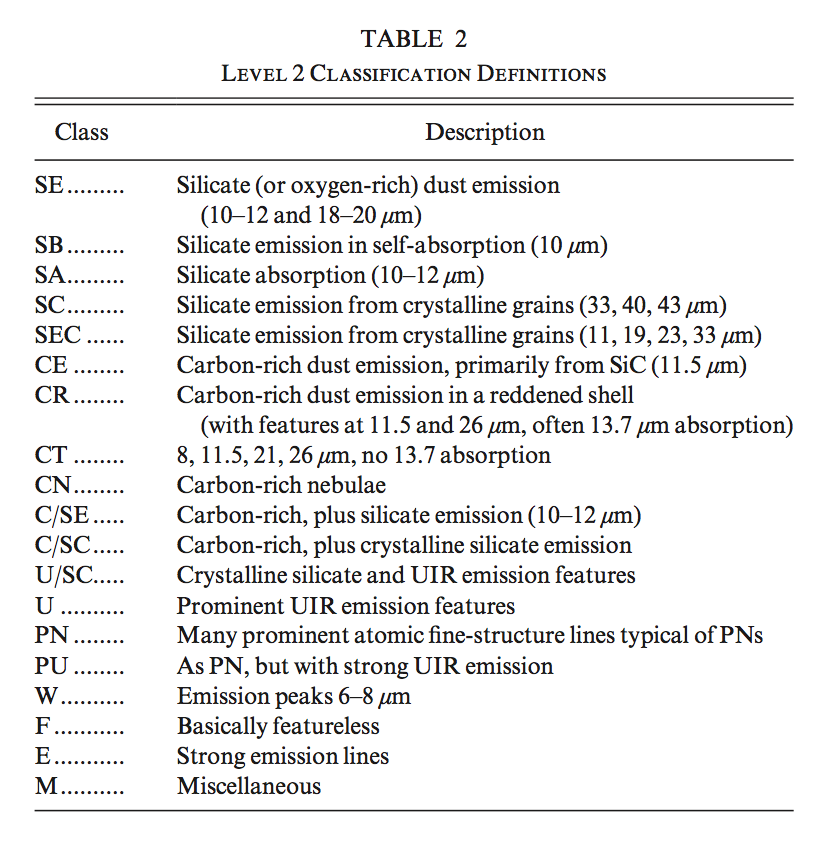

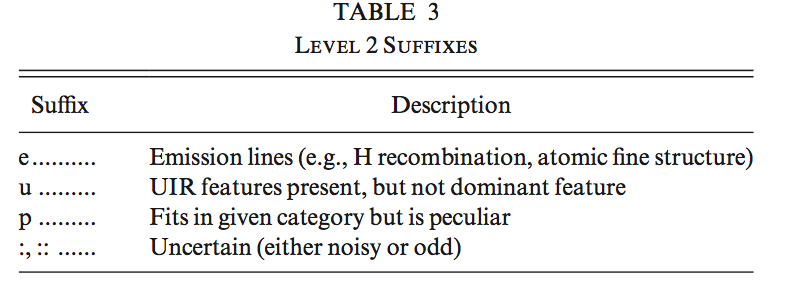

## Questions

- what format for a keras/TF NN? in plain ascii, the 400MB of FITS files becomes maybe 2GB of CSVs. Is this an issue?
- numpy ndarrays vs dataframes into keras/NN...?
- where would you get started? :)